## Training Models

Looking at 2 ways of training linear regression model
- Using direct closed form equation, that directly computes the model parameters that best fit the model to the training set
- using iterative optimaztion approach called GD that gradually tweaks the model parameters to minimize the cost function over the trainng set. Variants of the GD:
    - batch GD
    - mini batch GD 
    - Stochastic GD

After this, we look at the polynomial regression (more complex model that can fit non linear datasets). This model has more parameters than a linear regression, it is more prone to overfitting the training data. 

#### Linear Regression 

In Chapter 1, we saw the equation for the simple regression model of the life satisfaction:

\begin{equation*} life\_satisfaction = Œ∏_{0} + Œ∏_1 * GDP\_per\_capita\end{equation*}

Here, GDP_per_capita is input variable, Œ∏_0 and Œ∏_1 are model's parameters.  Œ∏_0 is a constant term called bias. 

\begin{equation*} y^ÀÜ = Œ∏_{0} + Œ∏_1x_1 + Œ∏_2x_2 + .... +  Œ∏_nx_n \end{equation*}

Here, 
- y^ is the predicted value
- n is the number of features
- xi is the ith feature value
- Œ∏j is the jth model parameter

Vectorized form of the above equation,

\begin{equation*} y^ÀÜ = h_{Œ∏}(x) = Œ∏.x \end{equation*}

Here, 
- Œ∏ is the model's parameter vector (incl. Œ∏0)
- x is feature vector
- Œ∏.x is the dot product of the vector Œ∏ and c
- hŒ∏ is the hypothesis function

To check the accuracy we check the deviation of the y^ with the y_actual using mean square error and root mean square error. 


##### The normal equation  

To find the value of Œ∏ that minimizes the cost function, there is a _closed-form solution_ ‚Äîin other words, a mathematical equation that gives the result
directly. This is called the _Normal Equation_

 \begin{equation*} Œ∏^ÀÜ = (X ^{‚ä∫}X)^{-1}X ^{‚ä∫}y  \end{equation*} 

- Œ∏ÀÜ is the value of Œ∏ that minimizes the cost function
- y is the vector of target values 

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(0.0, 2.0, 0.0, 15.0)

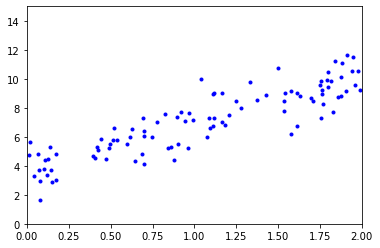

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

Computing Œ∏^ÀÜ using normal equation. Using ```inv()``` from numpy linear algebra module (```np.linalg```) to compute the inverse of the matrix and the ```dot()``` to compute the matrix multiplication. 

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) 

[[3.6849001 ]
 [3.24768904]]


This function predicted y = 4 + 3x_1 + gaussian noise. The actual values expected were (4,3) for (Œ∏0,Œ∏1). The deivation occurs due to the noise. We can make predictions using the values we got for Œ∏^

In [4]:
## Predicting 
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.6849001 ],
       [10.18027819]])

(0.0, 2.0, 0.0, 15.0)

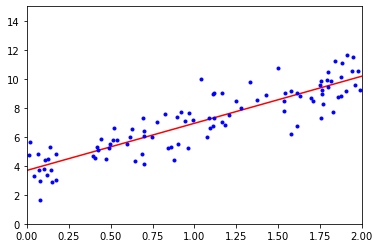

In [5]:
## Ploting the model predictions
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [6]:
## Method 2 using scikit lern
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_)
print(lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.6849001]
[[3.24768904]]
[[ 3.6849001 ]
 [10.18027819]]


The LinearRegression class is based on the ```scipy.linalg.lstsq()```
function (the name stands for ‚Äúleast squares‚Äù), which we can call directly

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[3.6849001 ]
 [3.24768904]]


This function computes ```ÀÜŒ∏ = X+y```, where X+ is the pseudoinverse of X
(specifically, the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)). can use ```np.linalg.pinv()``` to compute the pseudoinverse directly:

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.6849001 ],
       [3.24768904]])

The pseudoinverse itself is computed using a standard matrix factorization
technique called _Singular Value Decomposition (SVD)_ that can decompose
the training set matrix X into the matrix multiplication of three matrices U Œ£
VT (see ```numpy.linalg.svd()```)

##### Computational Complexity
The Normal Equation computes the inverse of XTX, which is an (n + 1) √ó (n + 1) matrix (where n is the number of features). The _computational complexity_ of inverting such a matrix is typically about O(n^2.4) to O(n^3), depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly 2^(2.4) = 5.3 to 2^3 = 8.

The SVD approach used by Scikit-Learn‚Äôs ```LinearRegression``` class is about
O(n^2). If you double the number of features, you multiply the computation
time by roughly 4.

### Gradient Descent 

- __General Idea__: tweak parameters iteratively to minimize a cost function
- __Learning Rate__: hyperparameter deciding the size of the steps
    - Small learning rate, the variable moves slowly towards the optimal value
    - High learning rate, the variable will jump higher values
- Starts by filling theta with random values (random initialization)
- __Parameter Space__: combination of model parameter that minimize the cost function
- __Issues__
    - can get stuck at local minima (if you stop early, will never reach global minima)
    - will reach global minima with low learning rate and long time
  
The MSE cost function for a linear regressions is a convex function, which means that if we pick two points on the curve, the line segment joining them will never cross the curve. This implies that there are no local minimum, just one global minimum. It is also a continous function with a slow that never changes abruptly. They make the GD to approach closer to the global minimum (for longer training and optimal learning rate) 

```When using GD, it's better to scale down thevariables such that they reach the minimum faster```

#### Batch Gradient Descent

In gradient descent, we need to calculate the partial derivative w.r.t. each of the model paramter. instead of doing that, we can use the equation below to compute that in one go.

\begin{equation*}  \frac \partial {\partialŒ∏_j} MSE(Œ∏) = \frac 2 m  \sum ^m _{i=1} (Œ∏^TX^{(i)} - y^{(i)})x_j^{(i)}\end{equation*}

The gradient vector del MSE(Œ∏) contains all the partial derivative of the cost function. Once we have the graident vector which points uphill, we go in the opposite direction. This is wehre we use the learning rate, when we decide the adjusted value for the next step. When we subtract the derivate from the Œ∏. 

In [9]:
eta = 0.1 #learning rate
n_iterations = 1000 #number of adjustments to the paramters
m = 100 #number of variables

In [10]:
theta = np.random.randn(2,1)

In [11]:
for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) ##Calculating the partial derivative
    theta = theta - eta*gradients ##adjustign the paramters based on the derivative and learning rate
    

In [12]:
##Checking hte results
print(theta)

[[3.6849001 ]
 [3.24768904]]


Similar result as the linear regression

(0.0, 2.0, 0.0, 15.0)

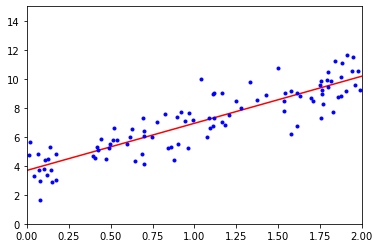

In [13]:
## Predicting 
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta)
y_predict

## Ploting the model predictions
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [14]:
def check_learning_rate(eta):
    theta = np.random.randn(2,1)
    n_iterations = 1000 #number of adjustments to the paramters
    m = 100 #number of variables
    for iterations in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) ##Calculating the partial derivative
        theta = theta - eta*gradients ##adjustign the paramters based on the derivative and learning rate
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_predict = X_new_b.dot(theta)
    ## Ploting the model predictions
    plt.plot(X_new,y_predict,"r-")
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
    plt.title(''.join(['Learning Rate = ', str(eta)]))

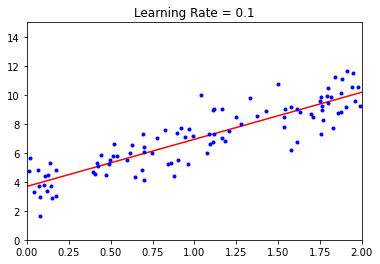

In [15]:
check_learning_rate(0.1)

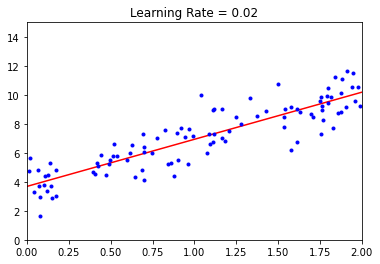

In [16]:
check_learning_rate(0.02)

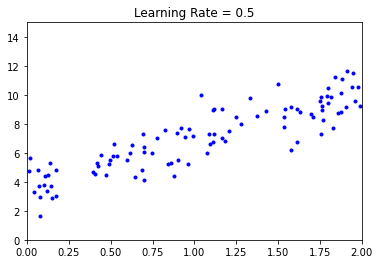

In [17]:
check_learning_rate(0.5)

<ipython-input-14-f0e699fa0a08>:7: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta*gradients ##adjustign the paramters based on the derivative and learning rate


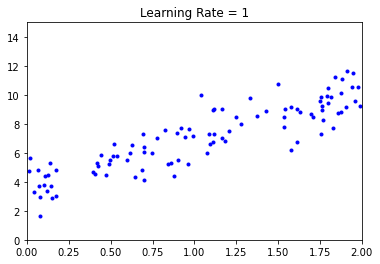

In [18]:
check_learning_rate(1)

<ipython-input-14-f0e699fa0a08>:7: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta*gradients ##adjustign the paramters based on the derivative and learning rate


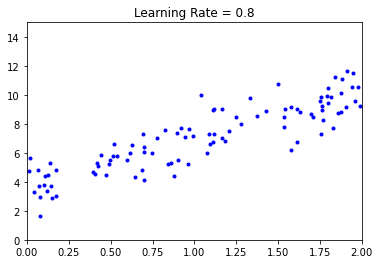

In [19]:
check_learning_rate(0.8)

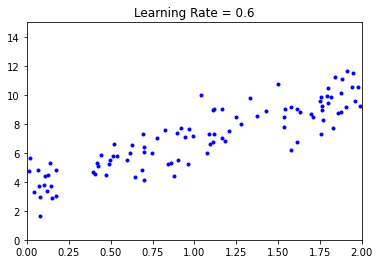

In [20]:
check_learning_rate(0.6)

- When the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. 
- When the learning rate looks is optimal:in just a few iterations, it has already converged to the solution. 
- WHen the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

Setting the iterations: set the number of iterations too high, and interupt the GD when the vector bcomes too tiny. 

#### Stochastic Gradient Descent

Main issue with Batch GD is to compute the gradients at  every step, which makes it a slow process. Especially when the training set is large. SGD or stochastic GD picks a random instance in the training set at every step and computes the gradient based on the single selected instance. This makes the algorithm much faster. Also making it easier to train on much larger dataset. SGD can be implemented as an out of core algorithm. 

It is also much less regular than the Batch GD, since it moves stochastically, instead of moving gently reaching minimum, the cost fucntion jumps up and down, moving down 'on average' over time it reached close to minimum. It keeps on bouncing u and down even though reaching very close to the minimum, finding the good parameters (not optimal always). This irregular nature of the cost function is useful when dealing with local minimum. This can be handled by gradually decreasing the learning rate, so it starts juping big but the jumps reduces in size once it's closer to the minimum. This process is akin to _stimulated annealing_ (similar to metallurgical annealing when the molten metal is slowly cooled down). 

The function that decided the learning rate at each iteration is called the _learning schedule_.  
- If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. 
- If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.


In [21]:
n_epoches = 50 #no of batches or rounds of training
t0, t1 = 5,50
m = 100 #number of variables

def learning_schedule(t):
    '''
    function to updated the learning rate
    
    #Argument:
    t (int): input learning rate change factor
    
    #Returns:
    learning rate
    '''
    return t0 / (t + t1)

In [22]:
theta = np.random.randn(2,1) #random initialization

In [23]:
for epoch in range(n_epoches):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta *gradients

In [24]:
theta

array([[3.71553732],
       [3.24298309]])

- In Batch GD the iterations were 1000, here they were on 50 rounds of training
- Some instances are picked randomly, and may come up again in several epoches, to avoid this we can shuffle the set
- when using SGD the training instances must be independent and identically distributed (IID) to ensure the paramters are pulled towards the global optimum, on average. Otherwise, if the instances are sorted by label, SGD will start optimizing only particular labels and will not result in global minimum


###### Using SGD for linear regression in ```scikit-learn```

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.64850429]), array([3.17549167]))

In [27]:
import joblib

joblib.dump(sgd_reg,'models/ch_04/sgd_linear_reg.pkl')

['models/ch_04/sgd_linear_reg.pkl']

#### Mini-batch Gradient Descent

Mini-batch GD computes the gradients on the small random sets of instances called mini-btaches. The main advantage of the Mini-batch GD over the Stochastic GD is that you can get a performance boost form hardware optimization of matrix operations, especially when using the GPUs.

The progress of hte gradients is less irregular than the SGD, especially with fairly large mini batched. As a result, Mini batch GD will end up walking around a bit closer to the minimum than Stochastic GD - it maybe harder to escape the local minima. 

#### Comparision of Algorithms for Linear Regression

| Algorithm | Large m | Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-learn |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|Normal Equation | Fast | No | Slow | 0  |No | N/A|
|SVD | Fast | No | Slow | 0  |No | LinearRegression |
|Batch GD | Slow | No | Fast | 2  |Yes | SGDRegressor|
|Stochastic GD | Fast | Yes | Fast | >=2  |Yes | SGDRegressor|
|Mini-Batch GD | Fast | Yes | Fast | >=2  |Yes | SGDRegressor|


There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

### Polynomial Regression 

Polynomial as the name suggest is when the variables are not linearly related the to target variable but instead are related with some powers to them. Eg: Square or to the power of three.

Example, using a simple quadratic equation

In [28]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

```np.random.randn``` generates samples from the normal distribution, while ```numpy.random.rand``` from a uniform distribution (in the range [0,1))

Text(0, 0.5, 'y')

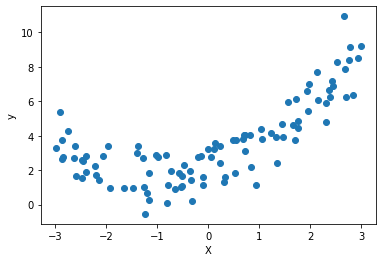

In [29]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

Since the graph cannot fit a linear line properly, we will use a polynomial fit using [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class to transform the training data. 

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
'''
PolynomialFeatures: Generate polynomial and interaction features.

##Paramters:
- degree: if a single int is given, it specifies the maximal degree of the polynomial features. If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum polynomial degree of the generated features. 
- include_bias: If True (default), then include a bias column, the feature in which all polynomial powers are zero

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
'''

'\nPolynomialFeatures: Generate polynomial and interaction features.\n\n##Paramters:\n- degree: if a single int is given, it specifies the maximal degree of the polynomial features. If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum polynomial degree of the generated features. \n- include_bias: If True (default), then include a bias column, the feature in which all polynomial powers are zero\n\nhttps://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html\n'

In [31]:
X_poly = poly_features.fit_transform(X)

In [32]:
import joblib

joblib.dump(poly_features, 'models/ch_04/poly_features.pkl')

['models/ch_04/poly_features.pkl']

In [33]:
X[0]

array([-0.5146618])

In [34]:
X_poly[0]

array([-0.5146618 ,  0.26487676])

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [36]:
lin_reg.intercept_, lin_reg.coef_

(array([2.12063396]), array([[0.92814612, 0.45560562]]))

In [37]:
joblib.dump(lin_reg, 'models/ch_04/poly_linear_reg.pkl')

['models/ch_04/poly_linear_reg.pkl']

In [38]:
Y_pred = lin_reg.predict(X_poly)

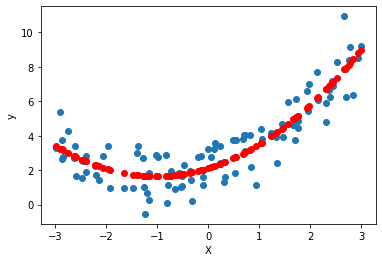

In [39]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X,Y_pred,color = 'red')

### Learning Curves

As we get more complex polynomial regression, our data wiggles around a lot more to get closer to the training instances. The high degree polynomial regression might also overfit the data, while the linear regression might underfit. We can use cross-validation to confirm the overfitting. Another way is to look at the _learning curves_. 

Learning Curves are the plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration). These plots are generated on triaing the model several times on different sized subsets. 

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+",linewidth = 2,label= "train")
    plt.plot(np.sqrt(val_errors), "b-",linewidth = 3,label= "val")
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim([0,3])
    plt.legend()

In [41]:
lin_reg_lc = LinearRegression()

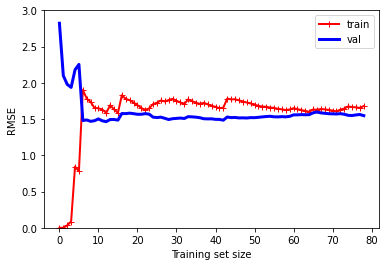

In [42]:
plot_learning_curves(lin_reg_lc,X,y)

The model is underfitted

- __Performance on the training data__: when there are 1 or 2 instances in the trianing set, the model fits them perfectly. As new instances are added to the training set, it becomes impossible for the model to fit the trianing data perfectly, both because the data is noisy and non linear. So the error goes up until it reaches a plateau, at this point adding new instances to the trianing set doesn't make the average error better or worse. 

- __Performance on the validation data__: When there are less instances, the model is not able to generalize properly, which is why the validation error is quite big. Then, as the model is shown more training examples, it learns, and the validation error goes down. However, due to underfitting the model's perofrmance stop improving after a point and stays close to the other curve. 

This learning curve is typical for an underfit model. Both curves reaching a stagnation, close and high. 

__Checking the learning curve for a 100th degree polynomial__

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree= 10, include_bias = False)),
    ("lin_reg",LinearRegression())
])

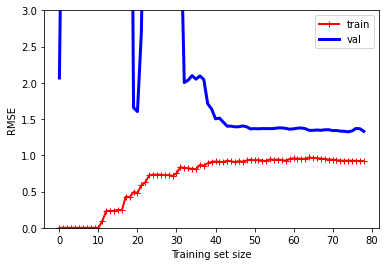

In [44]:
plot_learning_curves(polynomial_regression,X,y)

This learning curve also looks similar to the previous one, but there are two very important difference:
- The error in the training data is much lower than linear reg
- gap btw the curves. Model is performing better on the training data than the validation data, representing overfitting.


```One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error```

### Bias Variance Trade-off

A model's generalizatio error can be repressented as the sum of three very different errors: 

- __Bias__
    - due to wrong assumptions, like assuming data to be linear
    - high-bias is likely underfittting
- __Variance__
    - due to excessive senstivity to small variations in the trianing data. 
    - high-variance likely many degrees of freedom, resulting in overfitting
- __Irreducible Error__
    - due to noise in the data
    - only wat to reduce is to clean the data
    
Increasing model complexity will increase the variable and reduce it's bias. Conversely, reducing the model's comoplexity increases its bias and reduces its variance. Hence, called trade-off

### Regularized Linear Models

regularization reduces the overfitting of the models, it reduces the degrees of freedome of the model, resulting in contraints. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees. For regularizing a linear model, we can contraint the weights of the model.

Types of regularizations for linear model (ways to constraint the weights):
- Ridge regression
- Lasso regression
- Elastic Net

#### Ridge Regression 

It is also called Tikhonov regularization. It's the regularized version of the linear regression, a regularization term equal to below term is added to the cost function:
\begin{equation*} \alpha \sum ^n _{i=1} Œ∏_i ^ 2 \end{equation*}

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. _The regularization term is only added to the cost function during training, not for evaluation or validation._

The hyperparameter ùõº controls the degree of regularization. if ùõº = 0 then ridge reg is equivalent to linear reg, if ùõº is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

```It is important to scale the data before performing the Ridge Regression, as it is sensitive to the scale of the input features```

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [49]:
ridge_reg.predict([[1.5]])

array([[4.90990788]])

In [50]:
joblib.dump(ridge_reg,'models/ch_04/ridge_reg.pkl')

['models/ch_04/ridge_reg.pkl']

In [51]:
#Using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel()) #ravel - 

SGDRegressor()

In [52]:
sgd_reg.predict([[1.5]])

array([4.89456228])

In [53]:
joblib.dump(sgd_reg,'models/ch_04/sgd_ridge_reg.pkl')

['models/ch_04/sgd_ridge_reg.pkl']

#### Lasso Regression

- LASSO - Least absolute shrinkage and selection operator regression
- Another version of linear regression, like ridge regression adds a regualrization factor to the cost function but uses the l1 norm of the weight vector instead of half the square of the l2 norm. 
- it tends to eliminate the weights of the least important features. to say it automatically performs feature selection and outputs a sparse model (with few non zero feature weights)

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)

In [55]:
lasso_reg.predict([[1.5]])

array([4.8668448])

In [56]:
joblib.dump(lasso_reg,'models/ch_04/lasso_reg.pkl')

['models/ch_04/lasso_reg.pkl']

In [57]:
#Using SGD
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X,y.ravel()) #ravel -

SGDRegressor(penalty='l1')

In [58]:
sgd_reg.predict([[1.5]])

array([4.88856817])

In [60]:
joblib.dump(sgd_reg,'models/ch_04/sgd_lasso_reg.pkl')

['models/ch_04/sgd_lasso_reg.pkl']

#### Elastic Net

EN is a middle group between Ridge and Lasso Regression. The regularization term is a mix of ridge and lasso regularization terms, and we can control the mix ratio r. 
- when r = 0, EN is equivalent to ridge reg
- when r = 1, EN is equivalent to lasso reg


\begin{equation*} J(Œ∏) = MSE(Œ∏) + r \alpha \sum ^n _{i=1} |Œ∏_i| + \frac {1-r} 2 \alpha\sum ^n _{i=1} Œ∏_i ^2 \end{equation*}

##### When to use Linear Reg, Lasso, Ridge and Elastic Net?

- preferable to have a bit of regularizaton alsways
- ridge is a good default
- if we suspect only a few features re usefult, lasso or elastic net is prefered
- EN is prefered over lasso, because lasso may behave erratically when the #features is larger than the number of traiing instance or if strong correlation exists

In [61]:
#Example of scikit-learn EN

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
#l1_ratio correspnds to r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.8692976])

In [62]:
joblib.dump(elastic_net, 'models/ch_04/elastic_net.pkl')

['models/ch_04/elastic_net.pkl']

#### Early Stopping

A different way to regualrize GD is to stop training as soon as the validation error reaches a minimum. It's called early stopping. 

In [72]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#preparing the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
poly_scaler = Pipeline([("poly_feature",PolynomialFeatures(degree = 90,include_bias = False)),
                       ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

joblib.dump(poly_scaler,'models/ch_04/poly_scaler.pkl')

['models/ch_04/poly_scaler.pkl']

In [73]:
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                      penalty = None, learning_rate = "constant", eta0 = 0.0005)

In [75]:
#Note that with warm_start=True, when the fit() method is called it continues
#training where it left off, instead of restarting from scratch.

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train) #continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minumum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [76]:
joblib.dump(best_model,'models/ch_04/early_stopping_best_sgd.pkl')

['models/ch_04/early_stopping_best_sgd.pkl']

### Logistic Regression

Logistic regression is common regression algorithm used for estimating the probabilty than an instance belongs to a particular class. 

__Estimating Probabilities__

Logistic regression computes the weighted sum of the input features and a bias term, and outputs the result in a sigmoid transformation. This can be used to segegarate the output to particular class using a threshold. 


__Training and Cost Function__

The objective of trianing is to set the parameter vector such that the model estimated high probabiltiy for the positive instances and low probability for the negative instances. The cost function for a single training instance for y=1 is -log(p) and for y=0 is -log(1-p). The cost function over the whole trianing set is the average cost over all the trianing instance. it's represented as single expression called _log loss_

In [77]:
## Trying the iris dataset

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [79]:
X = iris.data[:,3:]

In [81]:
y = (iris["target"] == 2).astype(np.int) ##1 is Iris virginics, else 0

In [82]:
##Training the logistic model

from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [84]:
joblib.dump(log_reg,'models/ch_04/log_reg.pkl')

['models/ch_04/log_reg.pkl']

In [85]:
##Checkign the estimates

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

(0.0, 1.0)

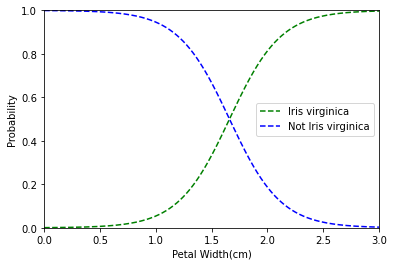

In [88]:
##Plotting the estimate to define decision boundary

plt.plot(X_new,y_proba[:,1],"g--",label = "Iris virginica")
plt.plot(X_new,y_proba[:,0],"b--",label = "Not Iris virginica")
plt.legend()
plt.xlabel("Petal Width(cm)")
plt.ylabel("Probability")
plt.xlim(0,3)
plt.ylim(0,1)

The decision bounddary is around 1.6 cm, where the ```.predict()``` function would create a boundary. 

In [89]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

#### Softmax Regression

The logistic regression model can be generalized to support multiple classes drirectly, without having to train and compute multiple binary classifiers. This is called __softmax regression__ or __multinomial logistic regression__.

Idea:
- when an instance is given (x)
- the softmax regression model computes sk(x) for each class k 
- estimates the probability of each class by applying softmax function (also called the normalized exponential) to the scores. 

\begin{equation*} s_k (x) = x ^T Œ∏^{(k)} \end{equation*}

- once we have the score sk for each class, we can estimate the probabilty pk that each instance belongs to the class k by running the scores through the softmax function. 
- the function computes the exponential of every score, then normalizes them by dividing the sum of exponentials
- the scores are called logits or log-odds 

\begin{equation*} p_k = \sigma (s(x))_k = \frac {exp (s_k (x))} {\sum ^K _ {j=1} exp (s_j (x))}\end{equation*}

Here,
 - K : number of classes
 - s(k): vector containing the score of each class for instance x
 - ùúé(ùë†(ùë•))ùëò : estimated probability that the instance x belongs to class k, given the scores of each class for the instance
 
 
Softmax regrssion classifier predicts the class with the highest estimated probabiltiy.

\begin{equation*} y = argmax_k œÉ(s(x))_k =argmax_k s_k(x) =argmax_k ((ùõâ^{(k)})^{‚ä∫}x) \end{equation*}

argmax operator returns the value of the variable that maximises a function. 

```Softmax function returns the value for one class at the time, it cannot predict mutilple classses at once```

__Cost function__

cross entropy is used to minimize the cost function of the softmax function. It penalizes the model when it estimates a low probability for a target class. It has originated from information theory. The target class will be coded with the least bit (0) and other classes will be coded with the bit (1). Cross entropy measures the average bit send to predict the correct class. Hence, when the prediction is correct the bits sent is same as the weather. In other cases it will be greated by an amount called __Kullback-leibler divergence (KL)__


In [91]:
X = iris["data"][:,(2,3)] ##petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [93]:
joblib.dump(softmax_reg,'models/ch_04/softmax_reg.pkl')

['models/ch_04/softmax_reg.pkl']

In [94]:
softmax_reg.predict([[5,2]])

array([2])

In [95]:
softmax_reg.predict_proba([[5,2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

### Excercises

__1. Which Linear Regression training algorithm can you use if you have a
training set with millions of features?__

We can use Stochastic GD or Mini Batch GD, which can take a few instance for trianing instead of the entire traning set

__2. Suppose the features in your training set have very different scales.
Which algorithms might suffer from this, and how? What can you do
about it?__

If the features are very different scales, GD might take longer to converge. Also in regualrization techniques, the unscaled feautres may create bias against the small featured if the scale difference is large

__3. Can Gradient Descent get stuck in a local minimum when training a
Logistic Regression model?__

GD get's stuck when the cost function is a concave curve. In case of logistic reg, the cost function is convex.

__4. Do all Gradient Descent algorithms lead to the same model, provided
you let them run long enough?__

Yes, however it need to be set at the optimal learning rate. Otherwise, they might get stuck and jump around without ever converging.

__5. Suppose you use Batch Gradient Descent and you plot the validation
error at every epoch. If you notice that the validation error consistently
goes up, what is likely going on? How can you fix this?__

If the validation error is contantly going up after reaching a minima and training error is not going up, that means the model is overfittign and too complex for the available training set. It can be fixed by early stoppign the training once, the validation error reached the training error.

__6. Is it a good idea to stop Mini-batch Gradient Descent immediately when
the validation error goes up?__

No, Mini batch gradient has a erratic nature since it randomly picks the instance btach for training. Instead of basing the judgement on the individual epoch validation error, we should look at the average error. As long as the average error is decreasing it's fine.  

__7. Which Gradient Descent algorithm (among those we discussed) will
reach the vicinity of the optimal solution the fastest? Which will
actually converge? How can you make the others converge as well?__

SGD is the fastest of all, since it takes only one instance for training. it can converge if the learning is rate is optimatal, which can be controled by a learning schedule. 

__8. Suppose you are using Polynomial Regression. You plot the learning
curves and you notice that there is a large gap between the training error
and the validation error. What is happening? What are three ways to
solve this?__

If the learning curve shows the training and the validation error curves with gap, it means the model is overfitting the trianing set and we need to simplify the model or add more training instance in the model. We can also try to regularize the model, which will increase the penalty for the training cost function, increasing the trianing error, and reducing the validation error.

__9. Suppose you are using Ridge Regression and you notice that the
training error and the validation error are almost equal and fairly high.
Would you say that the model suffers from high bias or high variance?
Should you increase the regularization hyperparameter Œ± or reduce it?__

If the training and validaiton error both are high and in same range, that means the model is underfitting the dataset and has a high bias. We need to add more complexity to the model. In case of ridge reg, we can reduce the alpha, reducing the regularization paramter and the penalty on the training set.

**10. Why would you want to use:**

- Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
- Lasso instead of Ridge Regression?
- Elastic Net instead of Lasso?

- Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?

Adding some regularization ensures that we have higher penalty on the triaing cost function and hence can reduct underfitting

- Lasso instead of Ridge Regression?

Lasso regression automatically reduces the zero weight variables from the moddel, resulting in sparse models. It picks the features which are important for the model instead of all the features. 

- Elastic Net instead of Lasso?

Lasso can have a bit of erratic nature when the features are highly correlated or if the number of vairables are higher than the number of training instances. It's better to have some ridge regression added in the regularization than purely lasso regression. 

__11. Suppose you want to classify pictures as outdoor/indoor and
daytime/nighttime. Should you implement two Logistic Regression
classifiers or one Softmax Regression classifier?__

Softmax can be used for a multiclass prediction, which can be different levels in the same target variable. Here there are two differnet target variables with 2 levels, hence we need to train two classifiers. 

__12. Implement Batch Gradient Descent with early stopping for Softmax
Regression (without using Scikit-Learn).__

In [ ]:
##ToDo